In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

import warnings                    
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("insurance_cleaned_data.csv")
df

,age,smoker,expenses
0,19,1,16884.92
1,18,0,1725.55
2,28,0,4449.46
3,33,0,21984.47
4,32,0,3866.86
...,...,...,...
1333,50,0,10600.55
1334,18,0,2205.98
1335,18,0,1629.83
1336,21,0,2007.95


**Data Modelling**

In [6]:
X = df[['age', 'smoker']]
y = df['expenses']

In [7]:
train = []
cv = []

for i in range(0, 100):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(X_train, y_train)

    ypred_train = model.predict(X_train)
    from sklearn.metrics import r2_score
    train.append(r2_score(y_train, ypred_train))

    from sklearn.model_selection import cross_val_score
    cv.append(cross_val_score(model, X_train, y_train, cv=5).mean())

import pandas as pd
d = pd.DataFrame({"train": train, "CV": cv})
d1 = d[abs(d["train"] - d["CV"]) <= 0.05]
rs = d1[d1["CV"] == d1["CV"].max()].index.tolist()[0]

print("Ideal Random State Number :", rs)


Ideal Random State Number : 54


**Train-Test Split**

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=18 )

### Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

# Save the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Print Intercept and Coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: -2458.0209275540437
Coefficients: [  276.49839957 24094.4486825 ]


**Prediction**

In [36]:
# prediction on train data
y_pred_train = model.predict(X_train)

# prediction on test data
y_pred_test = model.predict(X_test)

**Evaluation**

In [37]:
# Train R2
print("Train R2:", model.score(X_train, y_train))

# Test R2
print("Test R2:", model.score(X_test, y_test))

#CV Score
from sklearn.model_selection import cross_val_score
print("Cross Validation Score:", cross_val_score(model, X_train, y_train, cv=5).mean())

Train R2: 0.7212569749974574
Test R2: 0.7215362789248838
Cross Validation Score: 0.717158771549518


**Variables Significance**

In [38]:
import statsmodels.formula.api as smf

model1 = smf.ols("y ~ X", data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     1728.
Date:                Sat, 28 Jun 2025   Prob (F-statistic):               0.00
Time:                        23:58:20   Log-Likelihood:                -13623.
No. Observations:                1338   AIC:                         2.725e+04
Df Residuals:                    1335   BIC:                         2.727e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2391.6262    528.302     -4.527      0.000   -3428.019   -1355.233
X[0]         274.8712     12.455     22.069      0.000     250.437     299.305
X[1]        2.386e+04    433.488     55.031      0.000     2.3e+04    2.47e+04
==============================================================================
Omnibus:                      265.239   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              636.675
Skew:                           1.074   Prob(JB):                    5.60e-139
Kurtosis:                       5.609   Cond. No.                         130.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Variance Inflation Factor (VIF)**

In [39]:
# Calculating VIF values of independent variables

rsq_age = smf.ols('age~smoker', data=df).fit().rsquared
vif_age = 1/(1-rsq_age)

rsq_smoker = smf.ols('smoker~age', data=df).fit().rsquared
vif_smoker = 1/(1-rsq_smoker)

# Storing VIF values in a data frame

d1 = {'Variables':['age', 'smoker'], 'VIF': [vif_age, vif_smoker]}
vif_frame = pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,age,1.000626
1,smoker,1.000626


* No discrepancy found in VIF.

**Added variable plot (AV plot)**

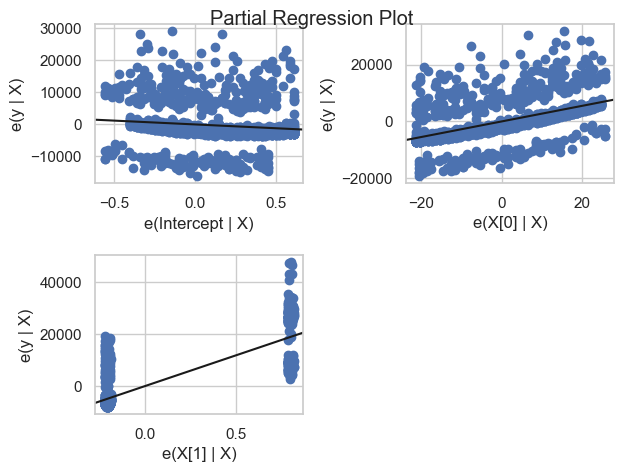

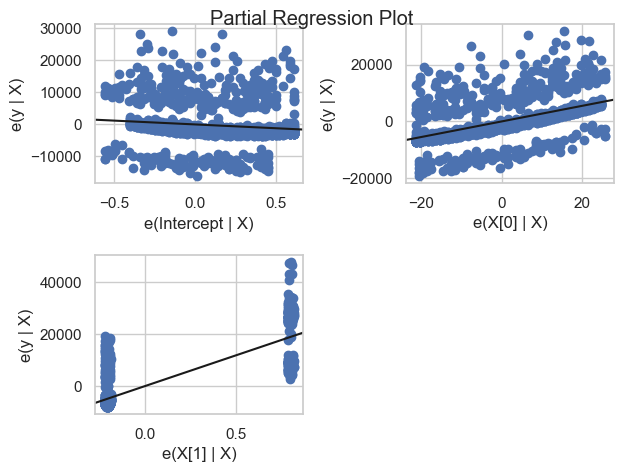

In [41]:
import statsmodels.api as sm
sm.graphics.plot_partregress_grid(model1)

* No discrepancy found in AV plot.

**Prediction on New Data**

* Determine the expenses for the following data-

In [ ]:
'''
age	sex	    bmi	children smoker	 region	    expenses
22	female	26.2	0	 yes	southwest	
65	male	31.7	2	 no	    southeast
'''

In [43]:
input_data = pd.DataFrame( {'age':[22, 65], 'smoker':[1, 0]} )
input_data

,age,smoker
0,22,1
1,65,0


In [44]:
model.predict(input_data)

array([27719.39254544, 15514.37504436])

* The expenses come out to be 27719.39 and 15514.37$ 